# Objective

**Day 24 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 24. monochrome**
    
Data used: https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/sea-level-data/

# Setup

In [40]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib

# Read Data

In [41]:
filepath = '../../SL_Plots/Data/jb_iby_sry_gtn_giy.nc'
sl = xr.open_dataset(filepath)
# read variables
lats = sl.variables['lat'].values
lons = sl.variables['lon'].values
date = sl.variables['time'].values
height = sl.variables['height'].values # sea level height
gmsl = sl.variables['gmsl'].values # global mean sea level

In [42]:
sl

<xarray.Dataset>
Dimensions:     (lat: 131, lon: 360, time: 329)
Coordinates:
  * lon         (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * lat         (lat) float32 -65.0 -64.0 -63.0 -62.0 ... 62.0 63.0 64.0 65.0
  * time        (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-05-15
Data variables:
    year        (time) int32 ...
    month       (time) int32 ...
    time_years  (time) float32 ...
    alt_map     (lat, lon) int16 ...
    height      (time, lat, lon) float32 nan nan nan nan ... 58.0 58.0 60.0 61.0
    gmsl        (time) int16 -48 -50 -42 -47 -42 -46 -41 ... 53 50 54 51 53 54
Attributes:
    description:  T/P + J-1 + J-2 data: Run params: with IB, A+S-A signal rem...
    history:      Created: 17-Jul-2020 17:50:47
    author:       Benoit Legresy

In [78]:
gmsl

array([-48, -50, -42, -47, -42, -46, -41, -44, -42, -46, -46, -43, -44,
       -46, -38, -41, -45, -44, -44, -41, -45, -42, -50, -42, -44, -40,
       -40, -38, -45, -38, -44, -37, -40, -38, -43, -37, -46, -35, -40,
       -35, -36, -32, -32, -33, -34, -26, -31, -39, -36, -37, -32, -35,
       -30, -31, -23, -27, -21, -29, -26, -34, -25, -27, -21, -25, -22,
       -27, -21, -25, -23, -24, -26, -25, -24, -22, -27, -25, -29, -26,
       -25, -22, -27, -18, -28, -18, -24, -18, -23, -20, -27, -19, -25,
       -18, -22, -15, -22, -21, -20, -18, -17, -17, -18, -17, -13, -17,
       -10, -18, -14, -20, -14, -14, -15, -16, -13, -15, -10,  -8, -12,
       -10, -14, -13, -12, -10, -11, -12, -11, -13, -11, -11,  -7, -10,
       -12, -11,  -7, -10,  -8,  -9, -10, -10,  -7,  -8,  -6, -10, -11,
        -7,  -8,  -6,  -5,  -7,  -6,  -4,  -4,  -4,  -4,  -5,  -3,  -2,
        -6,  -3,  -4,  -4,  -4,  -2,  -1,  -1,  -1,  -1,  -6,  -3,  -6,
        -4,  -4,   0,  -3,  -3,  -4,  -2,  -3,  -3,   0,  -4,   

In [43]:
# Linear Trend of monthly data
mean = np.mean(gmsl)
y_month= gmsl - mean
X_month = np.arange(0,len(date),1).reshape(-1, 1)

reg = LinearRegression().fit(X_month, y_month)
trend_month = reg.coef_
intercept_month = reg.intercept_
print(f"Linear yearly Trend: {trend_month}")

Linear yearly Trend: [0.29411608]


In [65]:
print(f'time length: {len(date)}')
alpha = np.arange(0,len(date),12)/len(date)
print(f'alpha coefficients: {alpha}')
print(len(alpha))

time length: 329
alpha coefficients: [0.         0.03647416 0.07294833 0.10942249 0.14589666 0.18237082
 0.21884498 0.25531915 0.29179331 0.32826748 0.36474164 0.40121581
 0.43768997 0.47416413 0.5106383  0.54711246 0.58358663 0.62006079
 0.65653495 0.69300912 0.72948328 0.76595745 0.80243161 0.83890578
 0.87537994 0.9118541  0.94832827 0.98480243]
28


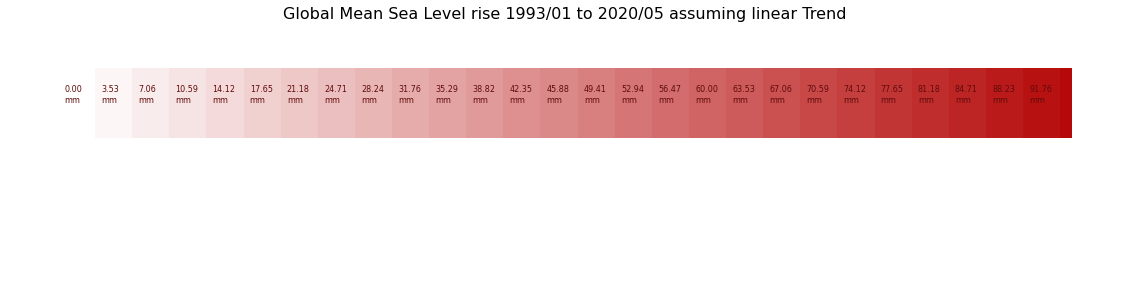

In [90]:
x = np.arange(len(date))
y = trend_month * x
fig, ax = plt.subplots(1, 1, figsize=(20,5))
colors = ['#610B0B', '#8A0808', '#B40404', '#DF0101', '#FF0000', '#FE2E2E', '#FA5858', '#F78181', '#F5A9A9']

for i in range(len(alpha)):
    if i == (len(alpha)-1):
        ax.hlines(0, xmin=x[i*12], xmax=x[-1], colors=colors[2], alpha=alpha[i], linestyles='solid', linewidth=70)
        ax.set_ylim(-.5, .2)
    else:
        ax.hlines(0, xmin=x[i*12], xmax=x[(i+1)*12], colors=colors[2], alpha=alpha[i], linestyles='solid', linewidth=70)
        ax.set_ylim(-.5, .2)
        ax.text(x=x[i*12]+2, y=0, s=f"{trend_month[0]*x[i*12]:.2f}\nmm", color=colors[0], fontsize=8)
ax.set_facecolor('white')
ax.set_title('Global Mean Sea Level rise 1993/01 to 2020/05 assuming linear Trend', fontsize=16)
ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.savefig("../plots/day24_monochrome.png")